# ATELIER : ACP-PARTIE 2

## Etude des individus:

### Importation des données

In [2]:
import pandas as pd

# Charger les données à partir du fichier CSV
df = pd.read_csv('electric_vehicles_data.csv', index_col=0)

# Afficher le DataFrame
df


,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH
Brand,,,,,
Tesla,4.6,233,450,161,940
Volkswagen,10.0,160,270,167,250
Polestar,4.7,210,400,181,620
BMW,6.8,180,360,206,560
Honda,9.5,145,170,168,190
Lucid,2.8,250,610,180,620
Peugeot,8.1,150,275,164,420
Audi,6.3,180,400,193,540
Mercedes,5.1,180,370,216,440


### Standardisation les données 

In [3]:
from sklearn.preprocessing import scale

# Sélectionner les colonnes numériques à centrer et réduire
columns_to_scale = df.columns

# Centrer et réduire les données
df_scaled = scale(df[columns_to_scale])

# Créer un nouveau DataFrame avec les données centrées et réduites
df_scaled = pd.DataFrame(df_scaled, columns=columns_to_scale)

# Afficher le DataFrame avec les données centrées et réduites
df_scaled


,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH
0,-1.100691,1.643419,1.186940,-0.974096,2.597285
1,1.221079,-0.409097,-0.529118,-0.659024,-0.859083
2,-1.057695,0.996736,0.710257,0.076142,0.994332
3,-0.154785,0.153236,0.328911,1.388940,0.693778
4,1.006100,-0.830847,-1.482483,-0.606512,-1.159636
5,-1.874614,2.121402,2.712324,0.023630,0.994332
6,0.404160,-0.690264,-0.481449,-0.816560,-0.007514
7,-0.369763,0.153236,0.710257,0.706285,0.593594
8,-0.885712,0.153236,0.424247,1.914058,0.092671
9,0.318168,-0.858964,-1.005800,-0.816560,-0.959267


In [9]:
# Calculer les moyennes et les écarts-types des colonnes centrées et réduites
means = df_scaled.mean()
std_devs = df_scaled.std()

# Afficher les moyennes
print("Moyennes après centrage et réduction :\n", means)

# Afficher les écarts-types
print("\nÉcarts-types après centrage et réduction :\n", std_devs)


Moyennes après centrage et réduction :


Écarts-types après centrage et réduction :



AccelSec           1.025978
TopSpeed_KmH       1.025978
Range_Km           1.025978
Efficiency_WhKm    1.025978
FastCharge_KmH     1.025978
dtype: float64

### Matrice d'inertie

In [8]:
# Calculer la matrice de covariance
inertia_matrix = df_scaled.cov()

# Afficher la matrice de covariance
print("Matrice d'inertie :\n")
inertia_matrix


Matrice d'inertie :



,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH
AccelSec,1.052632,-0.923699,-0.731704,-0.555368,-0.869868
TopSpeed_KmH,-0.923699,1.052632,0.825671,0.461273,0.928032
Range_Km,-0.731704,0.825671,1.052632,0.286400,0.766450
Efficiency_WhKm,-0.555368,0.461273,0.286400,1.052632,0.376478
FastCharge_KmH,-0.869868,0.928032,0.766450,0.376478,1.052632


### Valeurs Propres

In [11]:
import numpy as np

# Calculer les valeurs propres
eigenvalues, _ = np.linalg.eig(inertia_matrix)

# Afficher les valeurs propres
print("Valeurs propres :\n", eigenvalues)


Valeurs propres :
 [3.8369641  0.85035679 0.31807615 0.09962282 0.15813802]


### Variance expliquée et  variance cumulé 

In [14]:
# Calculer la variance et la variance cumulée
total_variance = np.sum(eigenvalues)
variance_ratio = eigenvalues / total_variance
cumulative_variance_ratio = np.cumsum(variance_ratio)

# Afficher les résultats
print("Variance associée à chaque valeur propre :\n", eigenvalues)
print("\nVariance cumulée associée à chaque valeur propre :\n", cumulative_variance_ratio)


Variance associée à chaque valeur propre :
 [3.8369641  0.85035679 0.31807615 0.09962282 0.15813802]

Variance cumulée associée à chaque valeur propre :
 [0.72902318 0.89059097 0.95102544 0.96995378 1.        ]


###  scree plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


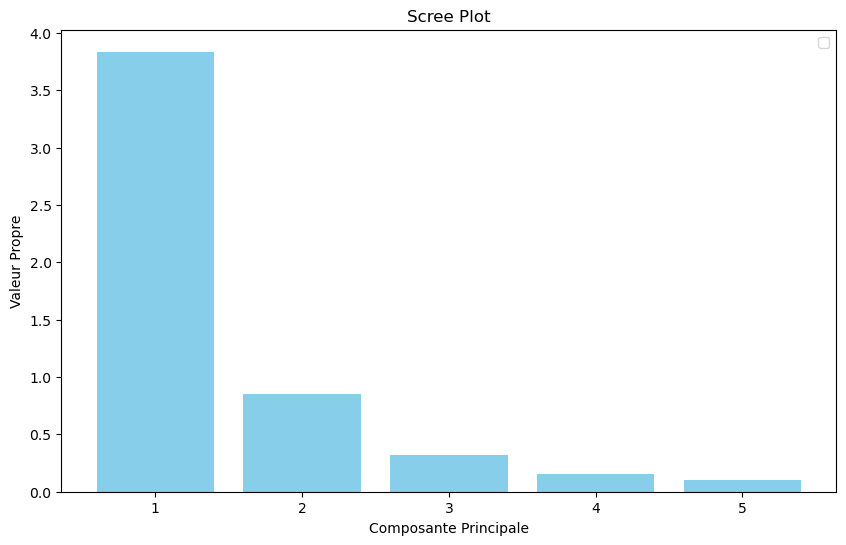

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Calculer les valeurs propres
eigenvalues, _ = np.linalg.eig(inertia_matrix)

# Trier les valeurs propres en ordre décroissant
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Tracer le scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, color='skyblue')
plt.xlabel('Composante Principale')
plt.ylabel('Valeur Propre')
plt.title('Scree Plot')
plt.show()

### Vecteurs PROPRES 

In [41]:

# Calculer les valeurs propres et vecteurs propres
eigenvalues, eigenvectors = np.linalg.eig(inertia_matrix)

# Afficher les vecteurs propres
print("Vecteurs propres :\n", eigenvectors)


Vecteurs propres :
 [[-0.48993896  0.06705535 -0.31735576  0.36494105  0.72219578]
 [ 0.50123206  0.11154068  0.14603638  0.84492746 -0.03310669]
 [ 0.43957594  0.33724989 -0.81601175 -0.16458364 -0.0085181 ]
 [ 0.29094312 -0.91164754 -0.22065875 -0.00672353  0.18845524]
 [ 0.48046991  0.1955084   0.4042193  -0.35465847  0.66464221]]


### Axes et composantes principales

In [15]:
import numpy as np


# Triez les valeurs propres
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

# Calculez le taux d'information cumulatif
cumulative_variance_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# Trouvez le nombre d'axes nécessaires pour atteindre un taux d'information proche de 95%
desired_variance_ratio = 0.95
num_axes = np.argmax(cumulative_variance_ratio >= desired_variance_ratio) + 1

print("Nombre d'axes pour atteindre {} % d'information c'est : {}".format(desired_variance_ratio * 100, num_axes))


Nombre d'axes pour atteindre 95.0 % d'information c'est : 3


In [16]:

# Triez les vecteurs propres en fonction des indices triés des valeurs propres
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Sélectionnez les premiers 'num_axes' vecteurs propres
principal_components = sorted_eigenvectors[:, :num_axes]

print("Les composantes principales sont :")
print(principal_components)


Les composantes principales sont :
[[-0.48993896  0.06705535 -0.31735576]
 [ 0.50123206  0.11154068  0.14603638]
 [ 0.43957594  0.33724989 -0.81601175]
 [ 0.29094312 -0.91164754 -0.22065875]
 [ 0.48046991  0.1955084   0.4042193 ]]


### Scores d'individus

In [17]:
# Projetez les données sur les composantes principales
X_pca = np.dot(df_scaled, principal_components)

print("Les scores des individus sur les composantes principales sont :")
print(X_pca)

Les scores des individus sur les composantes principales sont :
[[ 2.84926658  1.90561895  0.88556841]
 [-1.64039629  0.29064395 -0.21733173]
 [ 1.82991347  0.40477189  0.28677398]
 [ 1.034665   -1.01294575 -0.22293853]
 [-2.29466982 -0.19896919  0.43418246]
 [ 3.65865522  1.19850827 -0.91185255]
 [-0.9968124   0.53068562  0.34094603]
 [ 1.06087267 -0.29599888 -0.35575948]
 [ 1.29864826 -1.62605105 -0.42762146]
 [-1.72702054  0.14318948  0.3867589 ]
 [-0.34863909  1.13245234 -0.56905176]
 [ 3.85679374 -1.4275226   0.78312956]
 [-1.33132356 -1.21962319  0.0541156 ]
 [-1.71276797  0.4445341   0.91899238]
 [-0.9968124   0.53068562  0.34094603]
 [-1.42138101 -0.23910655 -0.55246619]
 [ 1.18948859 -0.82040336 -0.19308929]
 [-0.32688657  0.38139181 -0.5333982 ]
 [-2.1777419   0.47344625 -0.87841519]
 [-1.80385197 -0.59530772  0.43051102]]


### Visualisation des individus

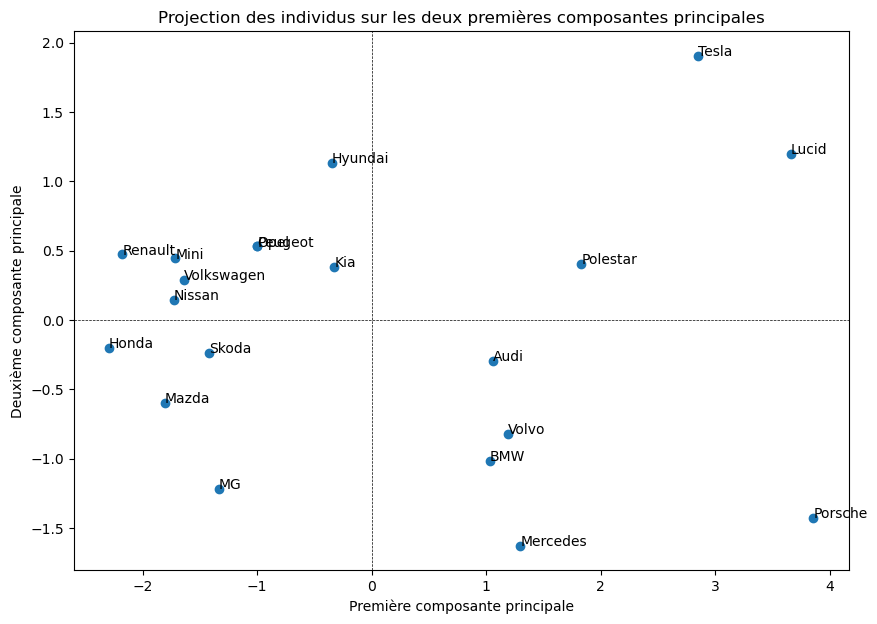

In [25]:
import matplotlib.pyplot as plt


# Séparer les étiquettes et les données
labels = df.index
data = df


# Créez un graphique de dispersion des scores sur les deux premières composantes principales
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1])

# Ajouter le repère (0, 0)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)

# Ajoutez des étiquettes aux points
for i, label in enumerate(labels):
    plt.text(X_pca[i, 0], X_pca[i, 1], label)

# Ajoutez des titres et des étiquettes d'axe
plt.title('Projection des individus sur les deux premières composantes principales')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')

# Affichez le graphique
plt.show()


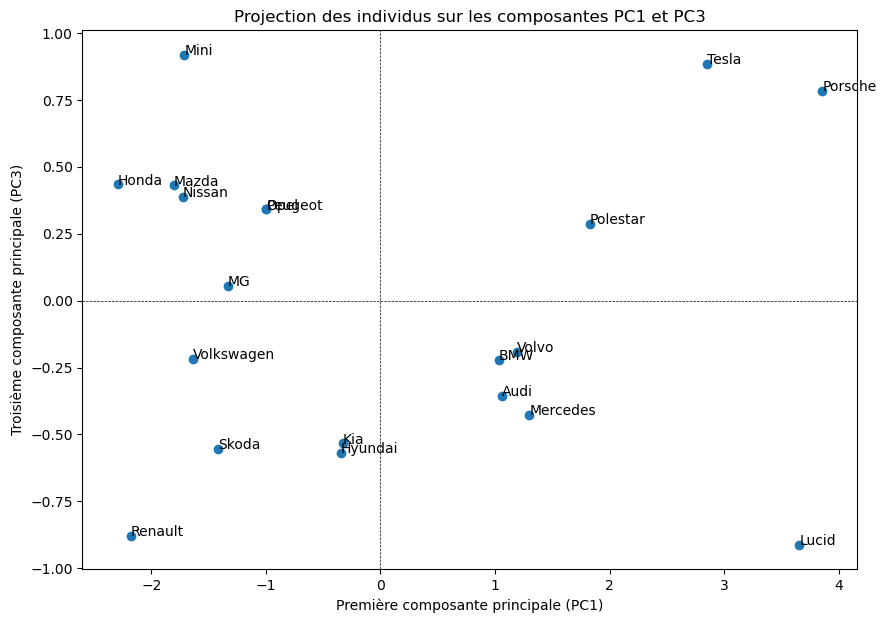

In [26]:


# Créer un graphique de dispersion des scores sur les composantes PC1 et PC3
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 2])  # Utiliser les indices 0 et 2 pour PC1 et PC3
# Ajouter le repère (0, 0)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
# Ajoutez des étiquettes aux points
for i, label in enumerate(labels):
    plt.text(X_pca[i, 0], X_pca[i, 2], label)

# Ajoutez des titres et des étiquettes d'axe
plt.title('Projection des individus sur les composantes PC1 et PC3')
plt.xlabel('Première composante principale (PC1)')
plt.ylabel('Troisième composante principale (PC3)')

# Affichez le graphique
plt.show()


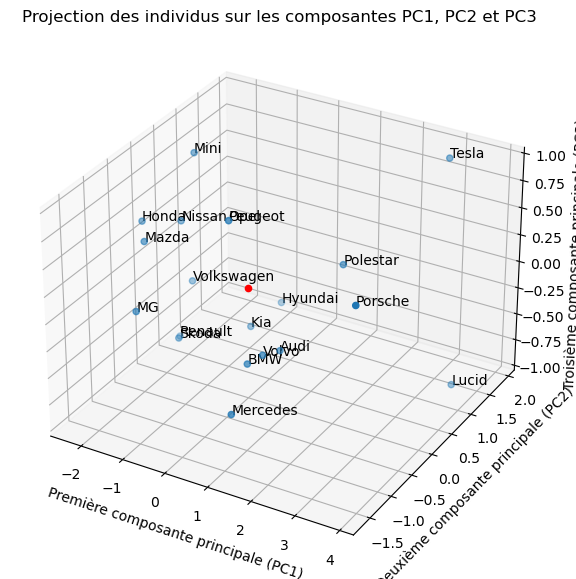

In [36]:
from mpl_toolkits.mplot3d import Axes3D

# Créer un graphique en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Tracer les nuages de points en utilisant PC1, PC2 et PC3
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])


ax.scatter(0, 0, 0, color='red')  # Ajouter un point pour l'origine de l'axe z

# Ajouter des étiquettes aux points
for i, label in enumerate(labels):
    ax.text(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], label)

# Ajouter des titres et des étiquettes d'axe
ax.set_title('Projection des individus sur les composantes PC1, PC2 et PC3')
ax.set_xlabel('Première composante principale (PC1)')
ax.set_ylabel('Deuxième composante principale (PC2)')
ax.set_zlabel('Troisième composante principale (PC3)')

# Afficher le graphique
plt.show()


### Contributions des individus :

In [47]:
# Calculez la somme des carrés des scores pour chaque composante principale
ss = np.sum(X_pca**2, axis=0)

# Calculez la contribution de chaque individu à chaque composante principale
contributions = (X_pca**2 / ss) * 100

print("Les contributions des individus aux composantes principales sont :")
print(contributions)

Les contributions des individus aux composantes principales sont :
[[11.1358874  22.47591283 12.97655815]
 [ 3.69110348  0.52283877  0.78155864]
 [ 4.59324669  1.01406526  1.36080149]
 [ 1.46844668  6.35064141  0.82240468]
 [ 7.2226916   0.24502864  3.11931937]
 [18.36122418  8.89052243 13.75829188]
 [ 1.36296759  1.74309019  1.9234751 ]
 [ 1.5437792   0.54228219  2.09424864]
 [ 2.3133521  16.36490791  3.0257586 ]
 [ 4.09122785  0.1269017   2.47511808]
 [ 0.16672888  7.93752461  5.35819896]
 [20.40382028 12.61279093 10.1480483 ]
 [ 2.43122917  9.20654255  0.04845742]
 [ 4.02397921  1.22308145 13.97459092]
 [ 1.36296759  1.74309019  1.9234751 ]
 [ 2.77127537  0.35385731  5.05041073]
 [ 1.94079304  4.16581593  0.61692396]
 [ 0.14657261  0.90030144  4.70780402]
 [ 6.50536216  1.38735173 12.7677674 ]
 [ 4.46334494  2.19345253  3.06678856]]


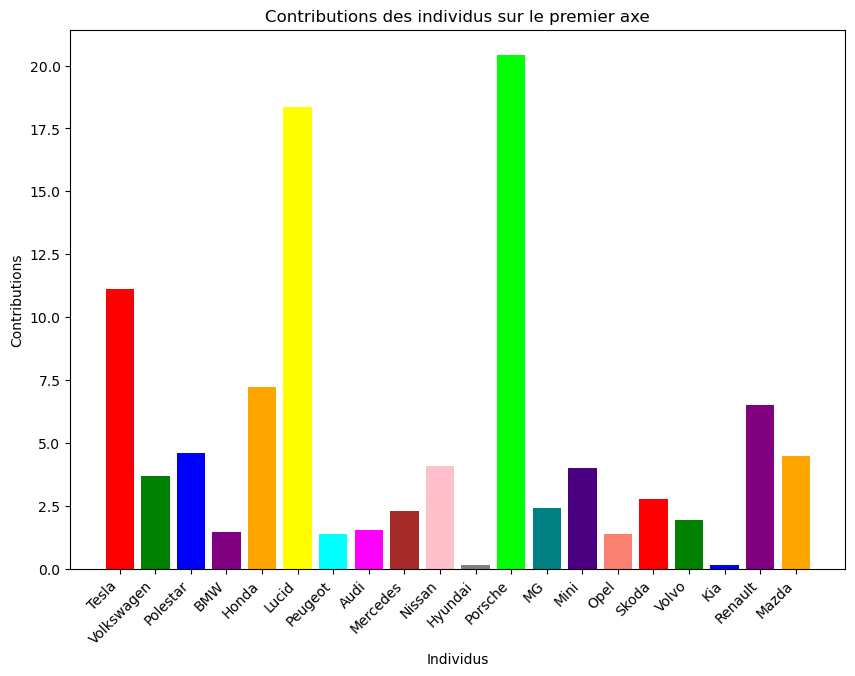

In [50]:
# Créez un graphique à barres des contributions des individus sur le premier axe avec des couleurs différentes
colors = ['red', 'green', 'blue', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'pink', 'grey', 'lime', 'teal', 'indigo', 'salmon']
plt.figure(figsize=(10, 7))
bar_plot = plt.bar(labels, contributions[:, 0], color=colors)  # Notez l'index 0 pour le premier axe

# Ajoutez des titres et des étiquettes d'axe
plt.title('Contributions des individus sur le premier axe')
plt.xlabel('Individus')
plt.ylabel('Contributions')

# Faites pivoter les étiquettes sur l'axe des x
plt.xticks(rotation=45, ha='right')

# Affichez le graphique
plt.show()


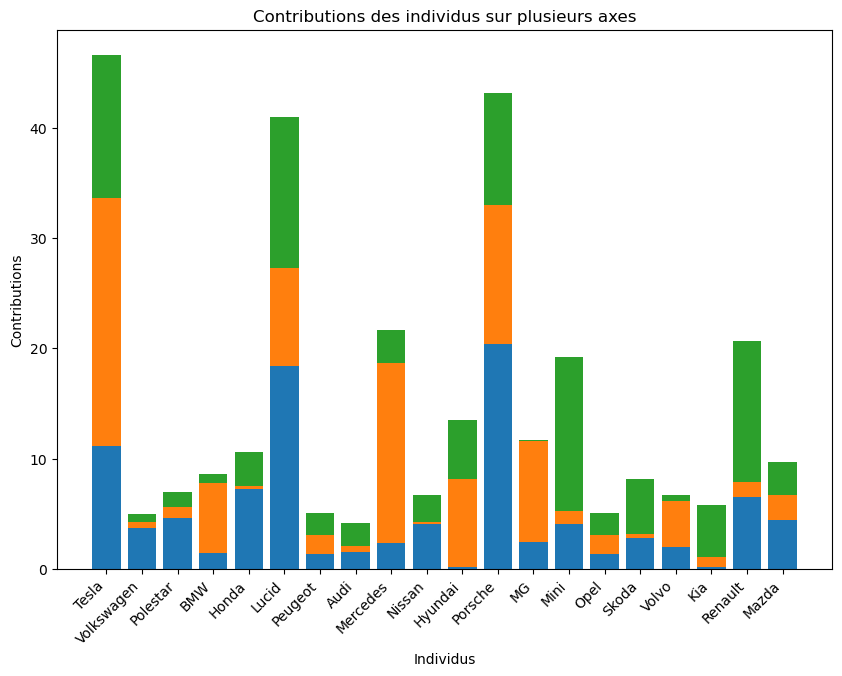

In [60]:
plt.figure(figsize=(10, 7))

# Ajoutez un segment de barre pour chaque axe
for i in range(contributions.shape[1]):
    plt.bar(np.arange(len(contributions)), contributions[:, i], bottom=np.sum(contributions[:, :i], axis=1))

# Ajoutez des titres et des étiquettes d'axe
plt.title('Contributions des individus sur plusieurs axes')
plt.xlabel('Individus')
plt.ylabel('Contributions')

# Faites pivoter et organisez les étiquettes sur l'axe des x
plt.xticks(np.arange(len(labels)), labels, rotation=45, ha='right')

# Affichez le graphique
plt.show()


### qualite de présentation des individus

In [30]:
# Calculez le carré des coordonnées pour chaque individu sur chaque composante principale
coordinates_squared = X_pca**2

# Calculez la somme des carrés des coordonnées pour chaque composante principale
sum_coordinates_squared = np.sum(coordinates_squared, axis=0)

# Calculez la qualité de la représentation pour chaque individu sur chaque composante principale
quality = coordinates_squared / sum_coordinates_squared

print("La qualité de la représentation pour chaque individu sur chaque composante principale est :")
print(quality)

La qualité de la représentation pour chaque individu sur chaque composante principale est :
[[0.11135887 0.22475913 0.12976558]
 [0.03691103 0.00522839 0.00781559]
 [0.04593247 0.01014065 0.01360801]
 [0.01468447 0.06350641 0.00822405]
 [0.07222692 0.00245029 0.03119319]
 [0.18361224 0.08890522 0.13758292]
 [0.01362968 0.0174309  0.01923475]
 [0.01543779 0.00542282 0.02094249]
 [0.02313352 0.16364908 0.03025759]
 [0.04091228 0.00126902 0.02475118]
 [0.00166729 0.07937525 0.05358199]
 [0.2040382  0.12612791 0.10148048]
 [0.02431229 0.09206543 0.00048457]
 [0.04023979 0.01223081 0.13974591]
 [0.01362968 0.0174309  0.01923475]
 [0.02771275 0.00353857 0.05050411]
 [0.01940793 0.04165816 0.00616924]
 [0.00146573 0.00900301 0.04707804]
 [0.06505362 0.01387352 0.12767767]
 [0.04463345 0.02193453 0.03066789]]


In [31]:
# Calculez le carré des distances à l'origine pour chaque individu dans chaque plan
distances_squared = np.sum(X_pca**2, axis=1)

# Calculez la somme des carrés des distances pour chaque plan
sum_distances_squared = np.sum(distances_squared)

# Calculez la qualité de la représentation pour chaque individu sur chaque plan
quality = distances_squared / sum_distances_squared

print("La qualité de la représentation pour chaque individu sur chaque plan est PC1,PC2 :")
print(quality)

La qualité de la représentation pour chaque individu sur chaque plan est PC1,PC2 :
[0.1317939  0.02967962 0.03779776 0.02256819 0.05776515 0.16459765
 0.01463164 0.01408617 0.04745814 0.03315038 0.01816794 0.18428498
 0.03430856 0.04180468 0.01463164 0.02505416 0.0223467  0.00564473
 0.06033829 0.03988971]


In [32]:
pc1 = X_pca[:, 0]  # Première composante principale
pc3 = X_pca[:, 2]  # Troisième composante principale

# Calculez le carré des distances à l'origine pour chaque individu dans le plan
distances_squared = pc1**2 + pc3**2

# Calculez la somme des carrés des distances pour le plan
sum_distances_squared = np.sum(distances_squared)

# Calculez la qualité de la représentation pour chaque individu sur le plan
quality = distances_squared / sum_distances_squared

print("La qualité de la représentation pour chaque individu sur le plan est PC1,PC3 :")
print(quality)

La qualité de la représentation pour chaque individu sur le plan est PC1,PC3 :
[0.11276794 0.03468372 0.04345797 0.01418991 0.06908571 0.18008861
 0.01405875 0.01585919 0.02367888 0.03967512 0.00564146 0.19618722
 0.02248824 0.04785717 0.01405875 0.02945747 0.01839448 0.00495743
 0.06984761 0.04356436]


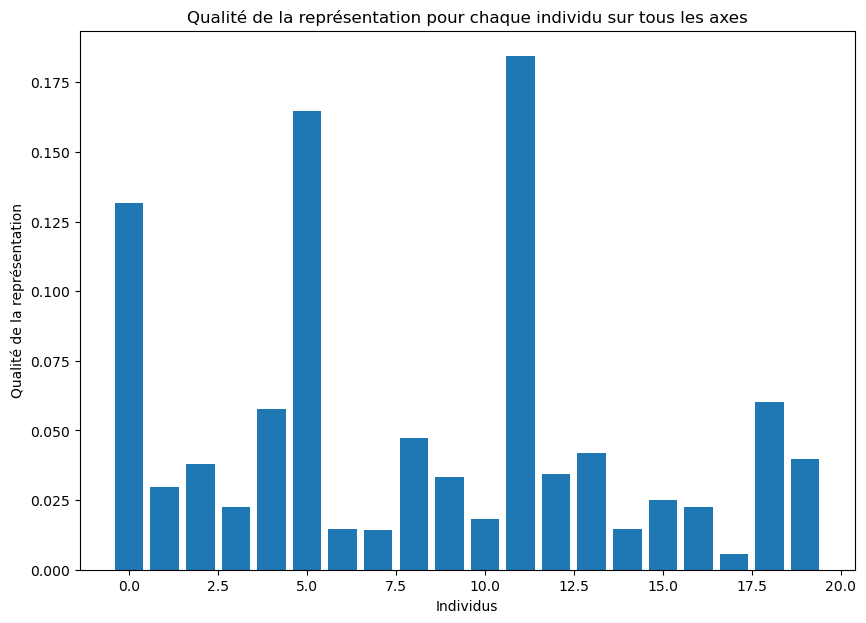

In [61]:


# Calculez le carré des scores pour chaque individu sur chaque axe
scores_squared = X_pca**2

# Calculez la somme des carrés des scores pour chaque individu
sum_scores_squared = np.sum(scores_squared, axis=1)

# Calculez la somme des carrés des scores pour tous les individus sur tous les axes
total_scores_squared = np.sum(sum_scores_squared)

# Calculez la qualité de la représentation pour chaque individu sur tous les axes
quality = sum_scores_squared / total_scores_squared

# Créez un graphique à barres de la qualité de la représentation pour chaque individu
plt.figure(figsize=(10, 7))
plt.bar(np.arange(len(quality)), quality)

# Ajoutez des titres et des étiquettes d'axe
plt.title('Qualité de la représentation pour chaque individu sur tous les axes')
plt.xlabel('Individus')
plt.ylabel('Qualité de la représentation')

# Affichez le graphique
plt.show()


## Etude des variables:

### Matrice de corrrelation

In [63]:
import pandas as pd

# Calculer la matrice de corrélation
correlation_matrix = df_scaled.corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation :\n")
correlation_matrix


Matrice de corrélation :



,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH
AccelSec,1.000000,-0.877514,-0.695119,-0.527600,-0.826374
TopSpeed_KmH,-0.877514,1.000000,0.784388,0.438209,0.881630
Range_Km,-0.695119,0.784388,1.000000,0.272080,0.728127
Efficiency_WhKm,-0.527600,0.438209,0.272080,1.000000,0.357654
FastCharge_KmH,-0.826374,0.881630,0.728127,0.357654,1.000000


### Valeurs et Vecteurs propres

In [66]:
# Calculer les valeurs propres et les vecteurs propres
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# Afficher les valeurs propres
print("Valeurs propres :\n" ,eigenvalues)

print("Vecteurs propres :\n",eigenvectors)


Valeurs propres :
 [3.6451159  0.80783895 0.30217235 0.09464168 0.15023112]
Vecteurs propres :
 [[-0.48993896  0.06705535 -0.31735576  0.36494105  0.72219578]
 [ 0.50123206  0.11154068  0.14603638  0.84492746 -0.03310669]
 [ 0.43957594  0.33724989 -0.81601175 -0.16458364 -0.0085181 ]
 [ 0.29094312 -0.91164754 -0.22065875 -0.00672353  0.18845524]
 [ 0.48046991  0.1955084   0.4042193  -0.35465847  0.66464221]]


### Variance

### Axes et Composantes Prinncipales

In [67]:
# Sélectionner les deux premiers vecteurs propres (composantes principales)
principal_components = eigenvectors[:, :2]

# Afficher les composantes principales
print("Composantes principales :\n", principal_components)

Composantes principales :
 [[-0.48993896  0.06705535]
 [ 0.50123206  0.11154068]
 [ 0.43957594  0.33724989]
 [ 0.29094312 -0.91164754]
 [ 0.48046991  0.1955084 ]]


### cercle de correlation

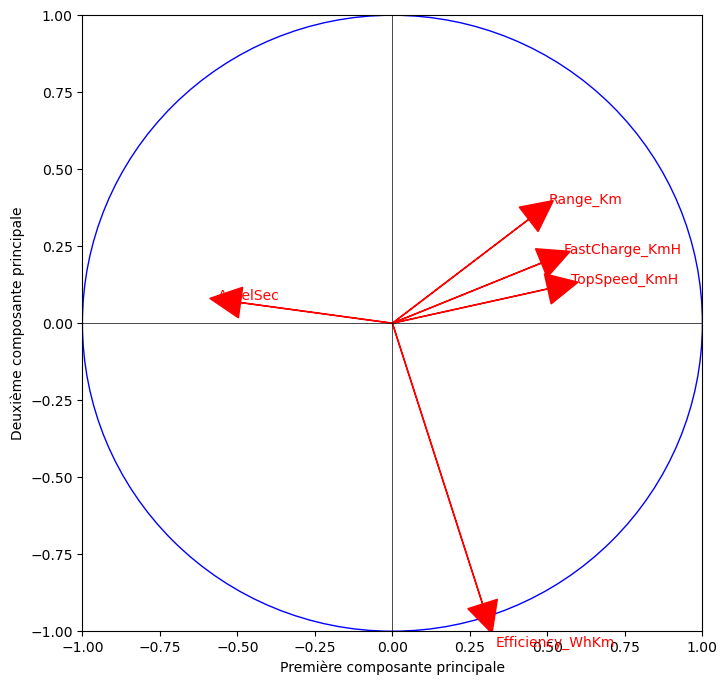

In [82]:
import matplotlib.pyplot as plt


x=df_scaled
n = X.shape[0]  # nombre d'observations
p = X.shape[1]  # nombre de variables


# Afficher le cercle de corrélation
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Dessiner le cercle
circle = plt.Circle((0, 0), 1, edgecolor='b', facecolor='none')
ax.add_patch(circle)

# Dessiner les flèches des variables
for i in range(p):
    ax.arrow(0, 0, eigenvectors[i, 0], eigenvectors[i, 1], head_width=0.1, head_length=0.1, fc='r', ec='r')
    ax.text(eigenvectors[i, 0] * 1.15, eigenvectors[i, 1] * 1.15, X.columns[i], color='r')

# Ajouter des axes et des étiquettes
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_xlabel('Première composante principale')
ax.set_ylabel('Deuxième composante principale')

# Afficher le graphique
plt.show()


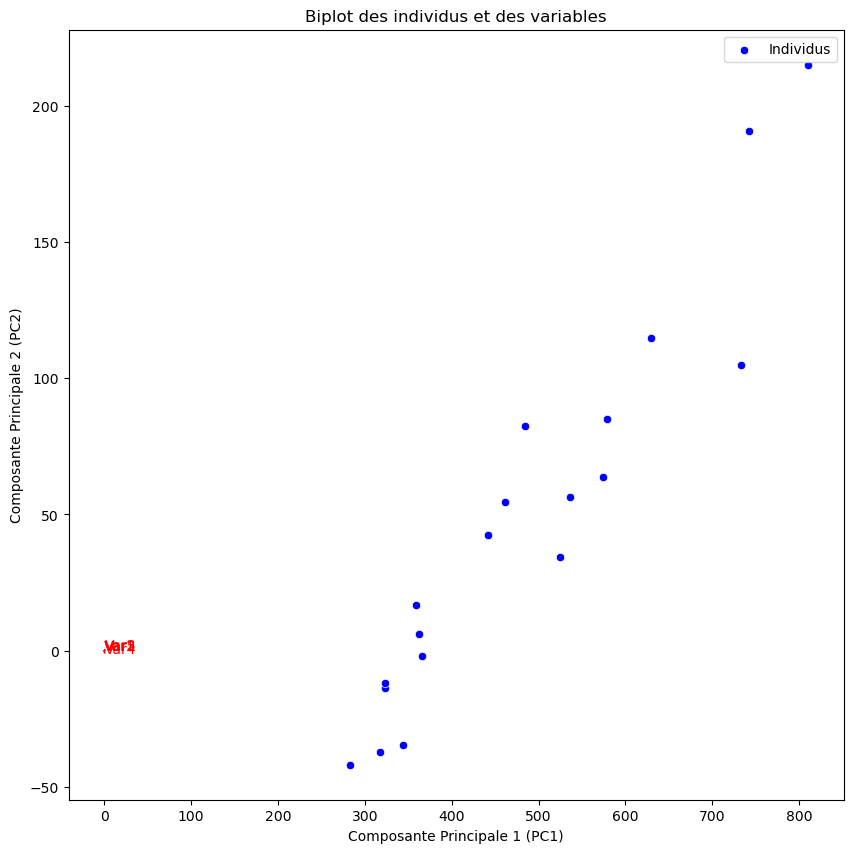

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
x=df_scaled

# Supposons que X est votre ensemble de données centré et réduit
n = X.shape[0]  # nombre d'observations
p = X.shape[1]  # nombre de variables

# Calculer les composantes principales (vecteurs propres)
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# Sélectionner les deux premiers vecteurs propres (composantes principales)
principal_components = eigenvectors[:, :2]

# Calculer les coordonnées des individus dans l'espace des composantes principales
individual_coordinates = np.dot(X, principal_components)

# Créer un DataFrame pour les coordonnées des individus
individual_df = pd.DataFrame(individual_coordinates, columns=['PC1', 'PC2'])

# Créer un DataFrame pour les vecteurs propres (variables)
variable_df = pd.DataFrame(eigenvectors[:, :2], columns=['PC1', 'PC2'])

# Créer un biplot
plt.figure(figsize=(10, 10))

# Tracer les individus
sns.scatterplot(data=individual_df, x='PC1', y='PC2', color='blue', marker='o', label='Individus')

# Tracer les variables avec des flèches
for i, variable in enumerate(variable_df.index):
    plt.arrow(0, 0, variable_df.loc[variable, 'PC1'], variable_df.loc[variable, 'PC2'], color='red', head_width=0.05, head_length=0.05)
    plt.text(variable_df.loc[variable, 'PC1']*1.1, variable_df.loc[variable, 'PC2']*1.1, f'Var{i+1}', color='red')

# Ajouter des titres et des étiquettes d'axe
plt.title('Biplot des individus et des variables')
plt.xlabel('Composante Principale 1 (PC1)')
plt.ylabel('Composante Principale 2 (PC2)')

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.show()
